In [34]:
#Install dependencies if running in a new environment
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [93]:
data = pd.read_csv('data/Hybrid_OAC.csv',index_col=0)
#drop all but 10000 rows (random sample)
samplesize = 100000
data = data.sample(n=samplesize, random_state=1)
#change the index so the they are just geo_001...
data.index = ['geo_'+str(i).zfill(5) for i in range(1,samplesize+1)]
#name the index column "geo_code"
data.index.name = 'geo_code'

#drop "country" column
data = data.drop(columns=['country'])
data = data*100
#round to ints
data = data.round(0).astype(int)
#save to data/example_oacdata.csv
data.to_csv('data/example_oacdata.csv')

In [94]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from clustergram import Clustergram

#random seed for reproducibility
random_seed = 505

#load the input data from a csv file 
#the names of the columns are not important, BUT;
#the first column of your input csv should be the geography code (eg Output Area or Local Authority Districts)
#this will be used as the dataframe index

#the rest of the columns should be the variables you want to use in clustering, provided as fractions or percentages.

input_df = pd.read_csv("data/example_oacdata.csv", index_col=0)
input_df.head()


#Check for missing values, and fill them with the mean of the column
input_df = input_df.fillna(input_df.mean())

input_df = input_df*100


In [95]:
def transform_data(df):
    # Inverse hyperbolic sin transform
    df = np.arcsinh(df)
    
    # Min-max scaling using Pandas
    df = (df - df.min()) / (df.max() - df.min())

    return df

# Transform the input data
input_df = transform_data(input_df)



In [96]:
# # Compute the correlation matrix
# corr_matrix = df.corr()

# # Set a correlation threshold, e.g., 0.9
# threshold = 0.9

# # Find the pairs of highly correlated columns
# # Create a mask to exclude the diagonal (correlation of a column with itself)
# highly_corr = np.where((corr_matrix > threshold) & (corr_matrix != 1))

# # List to keep track of columns to remove
# columns_to_remove = set()

# # Loop through the pairs and add one column to remove for each pair of high correlation
# for i, j in zip(*highly_corr):
#     colname_i = corr_matrix.columns[i]
#     colname_j = corr_matrix.columns[j]
    
#     # Keep the column that has the most information or less missing data
#     if colname_i not in columns_to_remove:
#         columns_to_remove.add(colname_j)  # Add the second column of the pair for removal

# # Remove the columns with high correlation
# df_cleaned = df.drop(columns=columns_to_remove)
# print(df_cleaned.columns)
# # Show the cleaned dataframe
# print(f"Removed columns: {columns_to_remove}")
# print(df_cleaned.columns)

#plot the correlation matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
# sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
# plt.show()

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.133 seconds.
K=3 fitted in 0.157 seconds.
K=4 fitted in 0.132 seconds.
K=5 fitted in 0.125 seconds.
K=6 fitted in 0.125 seconds.
K=7 fitted in 0.130 seconds.
K=8 fitted in 0.158 seconds.
K=9 fitted in 0.157 seconds.
K=10 fitted in 0.144 seconds.
K=11 fitted in 0.154 seconds.
K=12 fitted in 0.189 seconds.
K=13 fitted in 0.140 seconds.
K=14 fitted in 0.136 seconds.


<Axes: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

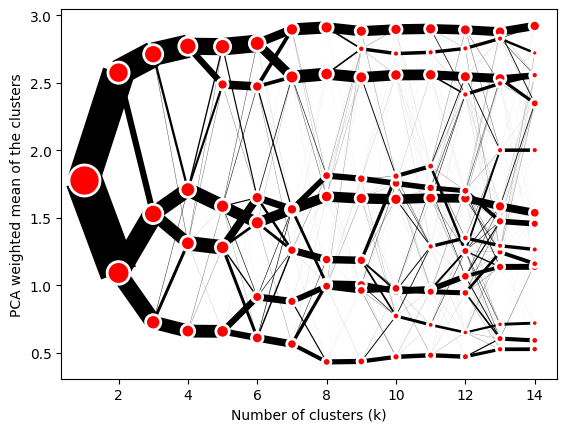

In [90]:
# n_init = 10
n_init = 1

cgram = Clustergram(range(1, 15), n_init=n_init, random_state=random_seed)
cgram.fit(input_df)
cgram.plot()


In [69]:
cgram.silhouette_score()
cgram.silhouette_.plot()

KeyboardInterrupt: 

In [83]:
import time

num_clusters = 8 

#n_init, number of times the k-means algorithm will run with different centroid seeds,
# the final results will be the best output of n_init consecutive runs in terms of inertia/wcss
n_init = 100

# K-Means Clustering Function
kmeans = KMeans(n_clusters=num_clusters, max_iter=1000, random_state=random_seed, n_init=n_init,verbose = True)
result = kmeans.fit(input_df)
# Run K-Means multiple times and pick the best result

Initialization complete
Iteration 0, inertia 501821.55271614424.
Iteration 1, inertia 367991.8878520544.
Iteration 2, inertia 359541.14907254465.
Iteration 3, inertia 355269.19543832034.
Iteration 4, inertia 353416.47214523586.
Iteration 5, inertia 352727.5908546938.
Iteration 6, inertia 352311.1409375083.
Iteration 7, inertia 352027.69292304956.
Iteration 8, inertia 351817.0729714031.
Iteration 9, inertia 351644.9463991792.
Iteration 10, inertia 351480.0971637311.
Iteration 11, inertia 351290.9269532863.
Iteration 12, inertia 351042.5569934375.
Iteration 13, inertia 350625.41814799904.
Iteration 14, inertia 350032.2438293164.
Iteration 15, inertia 349454.05414022895.
Iteration 16, inertia 349109.6374924848.
Iteration 17, inertia 348930.65720646176.
Iteration 18, inertia 348802.7667179991.
Iteration 19, inertia 348705.82388426224.
Iteration 20, inertia 348636.790708909.
Iteration 21, inertia 348586.7909443719.
Iteration 22, inertia 348547.74085449835.
Iteration 23, inertia 348512.49573

In [72]:
#output dataframe with cluster assignments
output_df = pd.DataFrame(index=input_df.index, columns=['cluster'])

# Define the number of clusters (K). You can choose K based on the clustergram plot above
K = 8  # You can adjust this value

# Intialise K-means clustering
kmeans = KMeans(n_clusters=K, random_state=44)
#fit the model to the data
output_df['cluster'] = kmeans.fit_predict(input_df)
# Show the results
print(f"K-means clusters:\n{output_df[['cluster']].head()}")  # Show the cluster assignments for the first few row

K-means clusters:
                cluster
Geography_Code         
E00000001             1
E00000003             1
E00000005             1
E00000007             1
E00000010             1


In [75]:
%pip install seaborn
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


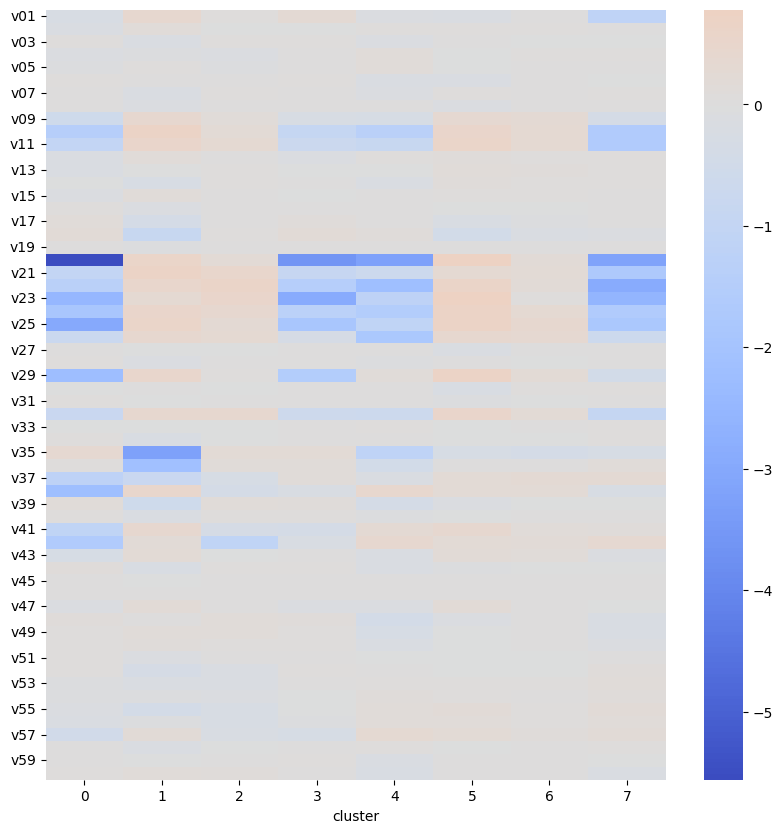

In [76]:

#find the properties of each cluster
combined_df = input_df.join(output_df)
# Compute the mean of each cluster
cluster_means = combined_df.groupby('cluster').mean()
#compute the overall mean
overall_mean = combined_df.mean()
# Compute the ratio of each cluster mean to the overall mean *100

cluster_means_ratio = (cluster_means - overall_mean)/cluster_means
cluster_means_ratio.drop(columns='cluster', inplace=True)



#plot the cluster_means_ratio (transposed for better visualization)
plt.figure(figsize=(10, 10))
sns.heatmap(cluster_means_ratio.T, cmap='coolwarm', center=0)
plt.show()

<Axes: xlabel='cluster'>

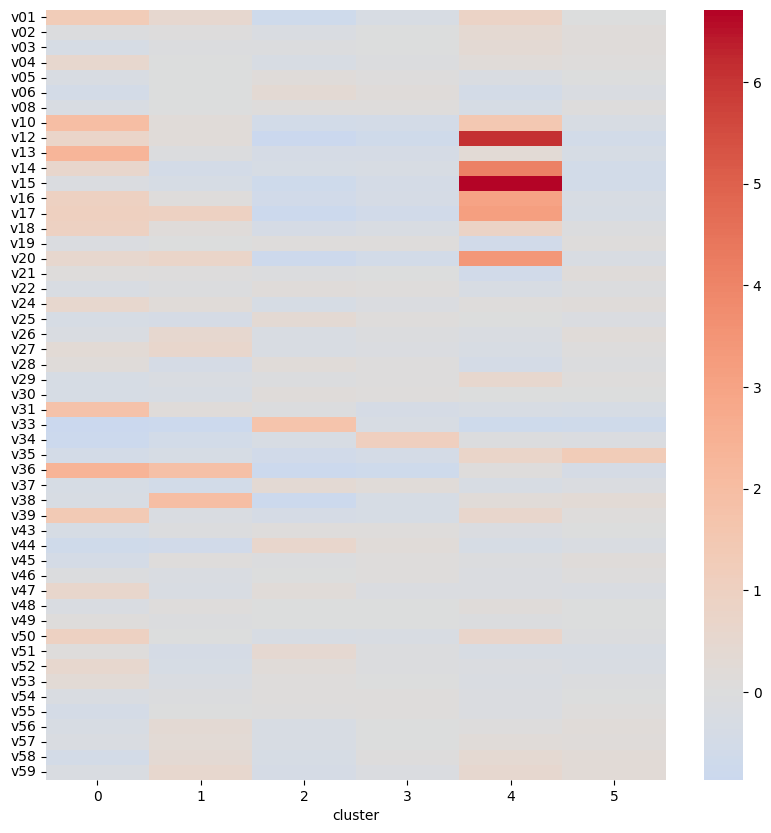

/tmp/ipykernel_5008/2494168732.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(unique_clusters))


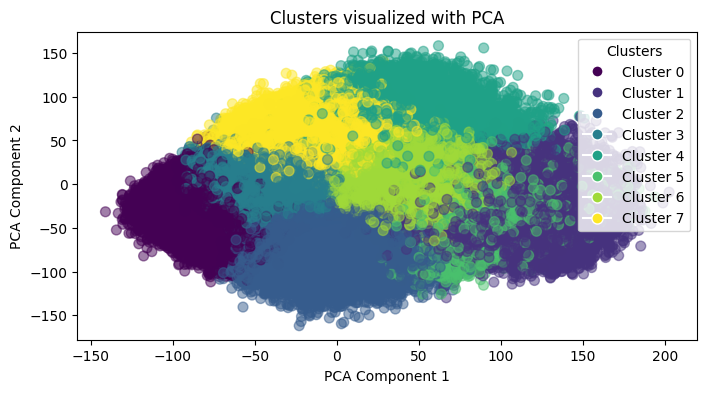

In [74]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

pca = PCA(n_components=2)
X_pca = pca.fit_transform(input_df)

# Get unique cluster labels and create a colormap
unique_clusters = np.unique(output_df['cluster'])
cmap = cm.get_cmap('viridis', len(unique_clusters))
norm = mcolors.Normalize(vmin=unique_clusters.min(), vmax=unique_clusters.max())

plt.figure(figsize=(8, 4))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=output_df['cluster'], cmap=cmap, s=50, alpha=0.5)

# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(norm(c)), markersize=8) 
           for c in unique_clusters]
labels = [f"Cluster {c}" for c in unique_clusters]
plt.legend(handles, labels, title="Clusters", loc="best")

plt.title("Clusters visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


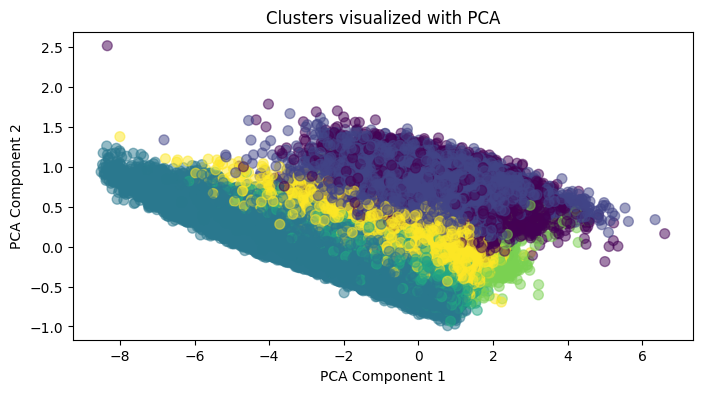

In [8]:
import geopandas as gpd
import pandas as pd


cluster_data = df_cleaned[['cluster']].reset_index()
# Load OA boundaries (adjust file path)
oa_boundaries = gpd.read_parquet("../data/OAbounds/oabounds.parquet")
#save to 

# Merge cluster data with OA boundaries
merged = oa_boundaries.merge(cluster_data, left_on='OA', right_on='OA')  # Replace 'OA_column_name' with the correct column name


# Save as GeoParquet
merged.to_parquet('../data/geodem_output/output_clusters.parquet')  # Use pyarrow or fastparquet as the engine
print("GeoParquet file saved: output_clusters.parquet")
# Save as GeoJSON
merged.to_file('../data/geodem_output/output_clusters.geojson', driver='GeoJSON')

# Creat


GeoParquet file saved: output_clusters.parquet


In [9]:
merged

,OA,geometry,cluster
0,N20000001,"POLYGON ((133999.041 553604.387, 133933.198 55...",2
1,N20000002,"POLYGON ((137867.869 549643.633, 137579.548 55...",2
2,N20000003,"POLYGON ((119677.815 552887.631, 119876.455 55...",2
3,N20000004,"POLYGON ((125778.611 552337.029, 126074.76 552...",2
4,N20000005,"POLYGON ((137867.869 549643.633, 137926.046 54...",2
...,...,...,...
239018,S00181665,"POLYGON ((293543.672 660480.892, 293615 660457...",2
239019,S00181666,"POLYGON ((293093 660410, 293048 660343, 292898...",4
239020,S00181667,"POLYGON ((292629 660343, 292740.877 660221.27,...",3
239021,S00181668,"POLYGON ((293195 660276, 293093 660201, 292900...",6


In [12]:
%pip install dash dash-leaflet

  Using cached plotly-5.24.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 7.3 MB/s eta 0:00:00a 0:00:01
Using cached plotly-5.24.1-py3-none-any.whl (19.1 MB)
Using cached blinker-1.9.0-py3-none-any.whl (8.5 kB)
Using cached itsdangerous-2.2.0-py3-none-any.whl (16 kB)
Using cached tenacity-9.0.0-py3-none-any.whl (28 kB)
Note: you may need to restart the kernel to use updated packages.
